# Project: Step 1 - Understanding data
# Problem: To Predict the Lung Capacity of a person based on certain parameters using Regression

In [1]:
# Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#Load the data into the data frame. 
df=pd.read_csv("LungCapData.csv")

## Understand data

In [3]:
# DataFrame information with its datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LungCap  654 non-null    float64
 1   Age      654 non-null    int64  
 2   Height   654 non-null    float64
 3   Gender   654 non-null    object 
 4   Smoke    654 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 25.7+ KB


In [4]:
# check for na values
#  null/na values =0 
# if na present then use SimpleImputer
df.isna().sum()

LungCap    0
Age        0
Height     0
Gender     0
Smoke      0
dtype: int64

In [5]:
# To display first 5 rows
df.head() 

,LungCap,Age,Height,Gender,Smoke
0,3.124,9,57.0,female,no
1,3.172,8,67.5,female,no
2,3.160,7,54.5,female,no
3,2.674,9,53.0,male,no
4,3.685,9,57.0,male,no


In [6]:
# Total number of rows and columns
df.shape

(654, 5)

In [7]:
# Rows containing duplicate data
dupli_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", dupli_rows_df.shape)

number of duplicate rows:  (3, 5)


In [8]:
# Dropping the duplicates  ---if present
df = df.drop_duplicates()

In [9]:
# After removing duplicate values , no of columns and rows
df.shape

(651, 5)

In [10]:
# Check Correlation between columns for Linear correlation 
df.corr()

,LungCap,Age,Height
LungCap,1.000000,0.756581,0.868084
Age,0.756581,1.000000,0.791973
Height,0.868084,0.791973,1.000000


C:\Users\varsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


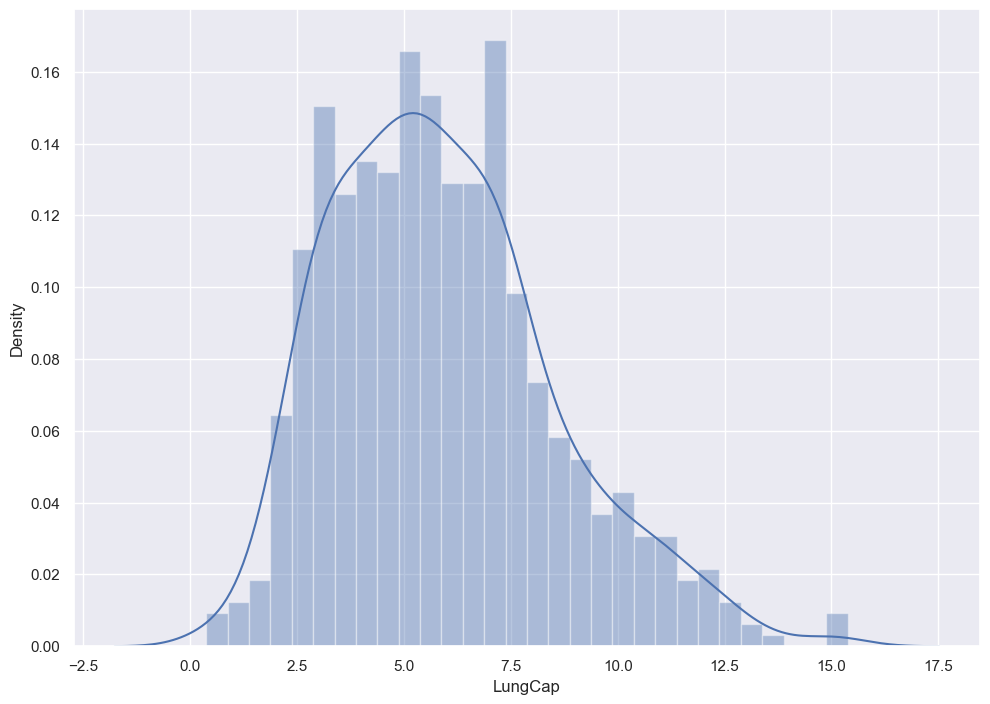

In [11]:
# Another way to plot distribution of Lung Capacity using seaborn library

# plot the distribution of the target variable 'LungCap'. We will use the distplot function from the seaborn library.
# We see that the values of 'LungCap' are distributed normally with few outliers.

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['LungCap'], bins=30)
plt.show()

In [12]:
# Description of each numeric column
# Observation:- Mean value is usually greater than Median value
df.describe()

,LungCap,Age,Height
count,651.000000,651.000000,651.000000
mean,5.909106,9.929339,61.145776
std,2.605618,2.957325,5.712709
min,0.373000,3.000000,46.000000
25%,3.925000,8.000000,57.000000
50%,5.635000,10.000000,61.500000
75%,7.351000,12.000000,65.500000
max,15.379000,19.000000,74.000000


In [13]:
# Detecting Outliers
# by default median is shown
# data spread,outliers,box is drawn on IQR i.e between Q1 and Q3
# red line -median and green line-mean

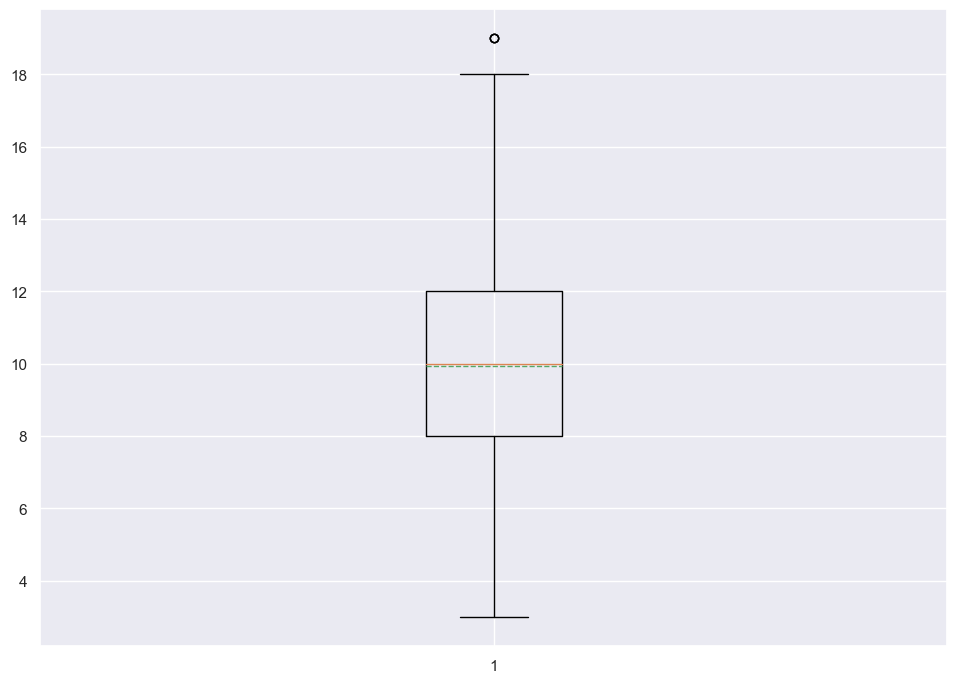

In [14]:
# For Age 
plt.boxplot(df["Age"],showmeans=True,meanline=True)
plt.show()

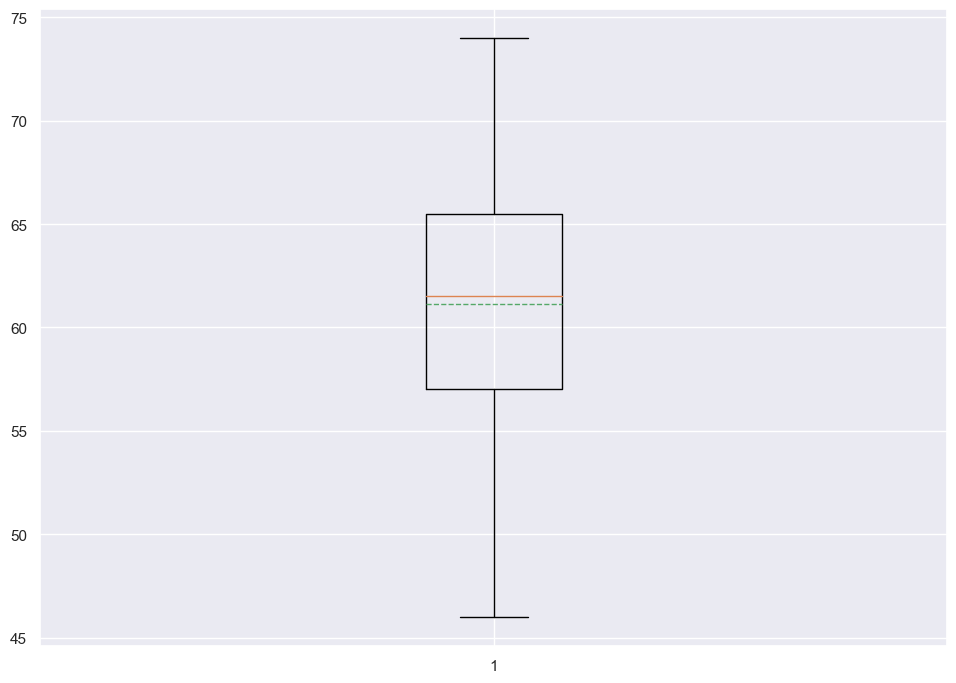

In [15]:
# For Height
plt.boxplot(df["Height"],showmeans=True,meanline=True)
plt.show()

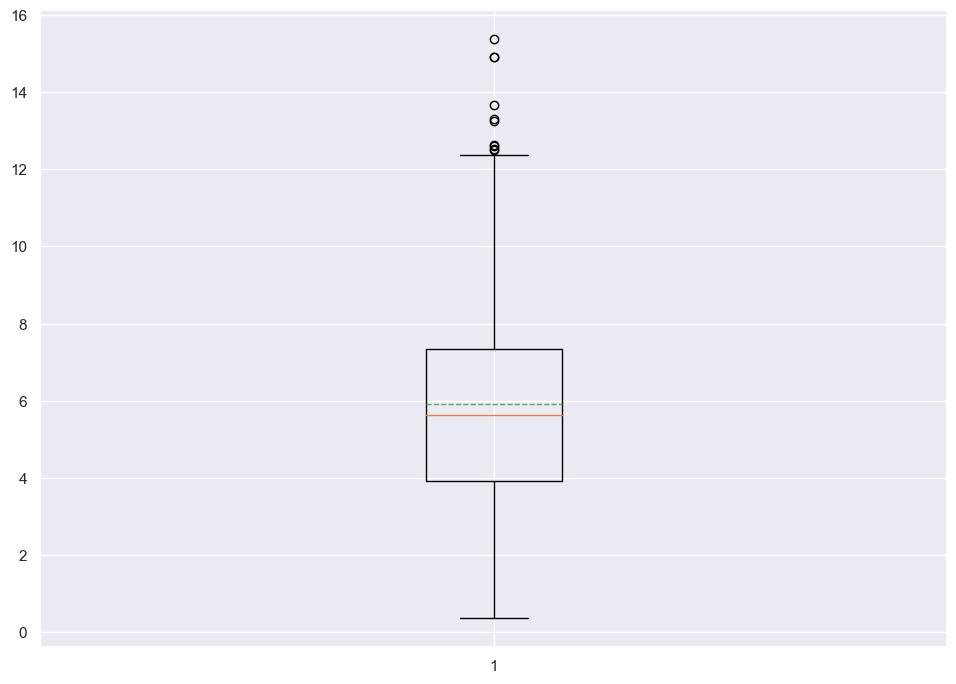

In [16]:
# For Lung Capacity
plt.boxplot(df["LungCap"],showmeans=True,meanline=True)
plt.show()

In [17]:
# outlier detection and removal using  IQR score technique

In [18]:
# Quartile calculations:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("-----------:IQR score:---------\n",IQR)

-----------:IQR score:---------
 LungCap    3.426
Age        4.000
Height     8.500
dtype: float64


In [19]:
outliers = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))]

outliers

C:\Users\varsh\AppData\Local\Temp\ipykernel_29812\2941047810.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))]


,LungCap,Age,Height,Gender,Smoke
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
649,NaN,NaN,NaN,NaN,NaN
650,NaN,NaN,NaN,NaN,NaN
651,NaN,NaN,NaN,NaN,NaN
652,NaN,NaN,NaN,NaN,NaN


In [20]:
outliers.sum()
# 2 columns have oultliers

LungCap    135.685
Age           57.0
Height         0.0
Gender           0
Smoke            0
dtype: object

In [21]:
# No.of outliers in each column
outliers.count()

LungCap    10
Age         3
Height      0
Gender      0
Smoke       0
dtype: int64

In [22]:
# total outliers
outliers.count().sum()

13

In [23]:
# Display only those rows , having axis=1 i.e True and outliers present

outliers=df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers

C:\Users\varsh\AppData\Local\Temp\ipykernel_29812\925407242.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers=df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


,LungCap,Age,Height,Gender,Smoke
320,12.526,14,72.0,male,no
451,13.672,12,70.0,male,no
463,12.631,13,73.0,male,no
516,13.249,13,74.0,male,no
562,12.493,12,71.0,male,no
608,13.306,19,72.0,male,no
609,8.557,19,66.0,female,yes
617,8.035,19,65.5,female,yes
623,15.379,15,69.0,male,no
631,14.899,17,73.0,male,no


In [24]:
# ((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR) is boolean mask-so we can use it to remove outliers
# masking the outliers by using '~' to exclude from original dataset
mask = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
mask

C:\Users\varsh\AppData\Local\Temp\ipykernel_29812\1793815458.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  mask = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


,LungCap,Age,Height,Gender,Smoke
0,3.124,9,57.0,female,no
1,3.172,8,67.5,female,no
2,3.160,7,54.5,female,no
3,2.674,9,53.0,male,no
4,3.685,9,57.0,male,no
...,...,...,...,...,...
649,10.810,16,67.0,male,yes
650,9.181,15,68.0,male,yes
651,6.559,18,60.0,female,no
652,6.385,16,63.0,female,yes


In [25]:
#total:normal distribution for each column
mask.count()

LungCap    639
Age        639
Height     639
Gender     639
Smoke      639
dtype: int64

In [26]:
mask.shape

(639, 5)

In [27]:
# Ways to convert categorical values to numeric values

 Encoding categorical values to numeric values
 Gender and Smoke -nominal data ---- 1st LabelEncoding ,and then One Hot Encoding
 Gender and Smoke is in String  we need to encode it to numeric value


from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [28]:
# for Smoke and Gender ----> Label Encoding
#le=LabelEncoder()
#X[:,2]=le.fit_transform(X[:,2])
#X[:,3]=le.fit_transform(X[:,3])

ColumnTransformer -- v 0.22
ohe=OneHotEncoder(categorical_features=[3]) X=ohe.fit_transform(X).toarray() print(X.shape)
What one hot encoding does is, it takes a column which has categorical data, which has been label encoded,
and then splits the column into multiple columns. 
The numbers are replaced by 1s and 0s, depending on which column has what value. 


#sklearn ver 0.22
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(
        [('one_hot_encoder',OneHotEncoder(categories='auto'),[3])],
    # The column numbers to be transformed
    remainder='passthrough'
    # leave the rest of the columns untouched 
)
X=ct.fit_transform(X)

 The get_dummies() function is used to convert categorical variable into dummy/indicator variables.
pandas has get_dummies(), which has a parameter drop_first you can set to True ---
to drop the first dummy variable column for each


In [29]:
column_names_for_onehot = df.columns[3:]
df= pd.get_dummies(df, columns=column_names_for_onehot, drop_first=True)
df

,LungCap,Age,Height,Gender_male,Smoke_yes
0,3.124,9,57.0,0,0
1,3.172,8,67.5,0,0
2,3.160,7,54.5,0,0
3,2.674,9,53.0,1,0
4,3.685,9,57.0,1,0
...,...,...,...,...,...
649,10.810,16,67.0,1,1
650,9.181,15,68.0,1,1
651,6.559,18,60.0,0,0
652,6.385,16,63.0,0,1


In [30]:
# Smoke: yes=1,no=0
df["Smoke_yes"].value_counts()

0    587
1     64
Name: Smoke_yes, dtype: int64

In [31]:
# Gender :  male=1,female=0
df["Gender_male"].value_counts()

1    335
0    316
Name: Gender_male, dtype: int64

In [32]:
#Finding the relations between the variables.
correlation=df.corr()

In [33]:
# find  correlation with LungCap
df.corr()["LungCap"]

LungCap        1.000000
Age            0.756581
Height         0.868084
Gender_male    0.209537
Smoke_yes      0.243566
Name: LungCap, dtype: float64

 ***To fit a linear regression model, we select those features which have a high correlation with our target variable "LungCap",
 By looking at the correlation matrix we can see that Height and Age  has a strong positive correlation with "LungCap" (0.87,0.76 resp) (also check for  high negative correlation)

  **** An important point in selecting features for a linear regression model is to check for multi-co-linearity ---> that is correlation between independent features . (for eg ,The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model.)
  Here Age and Height have a corelation of 0.79



<AxesSubplot:>

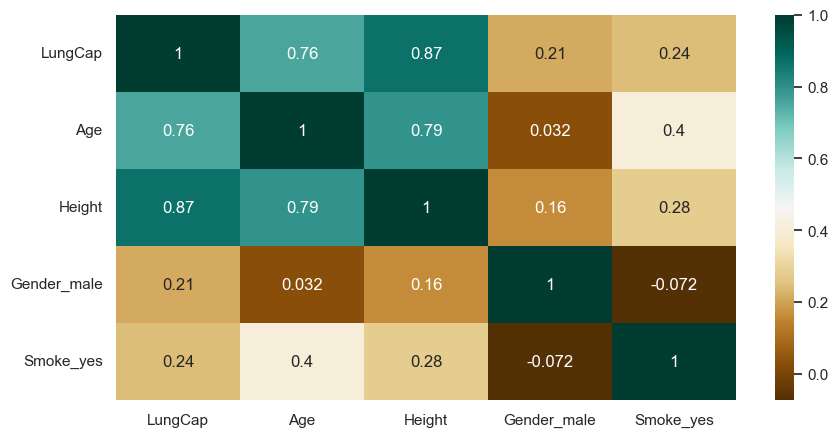

In [34]:
# from the figure,  height is highly correlated to Lung Capacity
plt.figure(figsize=(10,5))
sns.heatmap(correlation,cmap="BrBG",annot=True)

***Another way to plot scatter plot :-Based on the above observations we will have Height  and Age as our features.
Using a scatter plot let’s see how these features vary with 'LungCap'. (to show in single figure)

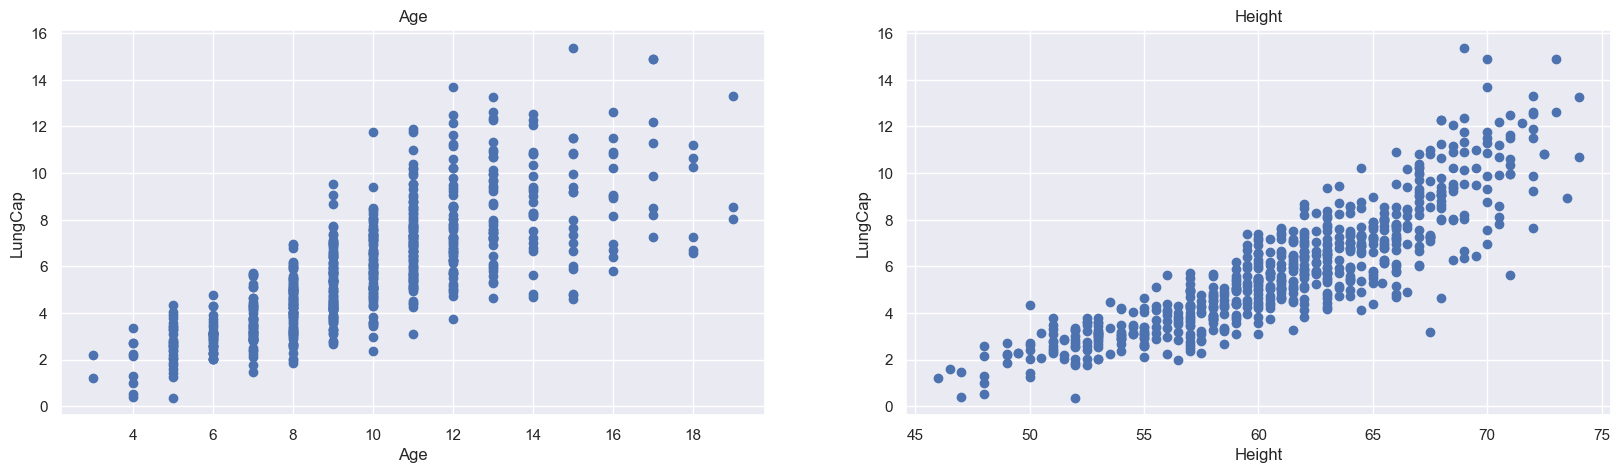

In [35]:
plt.figure(figsize=(20, 5))

features = ['Age', 'Height']
target =df['LungCap']
# The enumerate() function adds a counter as the key of the enumerate object
# (here features are objects assigned to col and key or index of object to i)

for i, col in enumerate(features):
    #Add a subplot to the current figure.
    # syntax: subplot(nrows =1 , ncols= len(features), index=i+1, **kwargs)
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('LungCap')

**** Observation:- **** 
The 'LungCap' increase as the value of 'Age', 'Height' increases linearly. There are few outliers 

#  With Outliers

In [36]:
df.describe()

,LungCap,Age,Height,Gender_male,Smoke_yes
count,651.000000,651.000000,651.000000,651.000000,651.000000
mean,5.909106,9.929339,61.145776,0.514593,0.098310
std,2.605618,2.957325,5.712709,0.500171,0.297963
min,0.373000,3.000000,46.000000,0.000000,0.000000
25%,3.925000,8.000000,57.000000,0.000000,0.000000
50%,5.635000,10.000000,61.500000,1.000000,0.000000
75%,7.351000,12.000000,65.500000,1.000000,0.000000
max,15.379000,19.000000,74.000000,1.000000,1.000000


In [37]:
#X should in 2D matrix and y be 1D

In [38]:
X=df.iloc[:,1:5].values
y=df.iloc[:,0].values

In [39]:
print(X.shape,y.shape)

(651, 4) (651,)


In [40]:
# for na values - to convert na values to mean 
#by default SimpleImputer fill na with mean values of individual column

In [41]:
#from sklearn.preprocessing import SimpleImputer
from sklearn.impute import SimpleImputer
# Imputer class-used to fill na values
# 1. Import class
# 2.create an instance of that class
# 3.Fit instance on data and transform the data 

si=SimpleImputer()
# by default SimpleImputer fills na values with the mean value of individual column
X[:,1:]=si.fit_transform(X[:,1:])
print(X[:,0:])

[[ 9.  57.   0.   0. ]
 [ 8.  67.5  0.   0. ]
 [ 7.  54.5  0.   0. ]
 ...
 [18.  60.   0.   0. ]
 [16.  63.   0.   1. ]
 [15.  66.5  0.   0. ]]


In [42]:
# split data into training set and testing set
from sklearn.model_selection import train_test_split
# use R2 score to measure the accuracy of our model.
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [43]:
# seed value =random_state --- decide the accuracy 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [44]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(520, 4) (131, 4) (520,) (131,)


In [45]:
model=LinearRegression()
# training data to fit model
model.fit(X_train,y_train) # this model.fit figure out coeff and intercept

LinearRegression()

# Linear Regression without masking

# To check how good model is
#Model evaluation for training dataset and testing dataset
#We will evaluate our model using RMSE- (root mean squared error )and R2-score. 

In [46]:
# model evaluation for training set

#predict the values on the X_training data for y_train_predict
y_train_pred = model.predict(X_train)
# RMSE on training dataset
rmse_train= (np.sqrt(mean_squared_error(y_train, y_train_pred)))
# R2 on training dataset
r2_train = r2_score(y_train, y_train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_train))
print('R2 score is {}'.format(r2_train))
print("\n")


# model evaluation for training set

#predict the values on the X_test data for y_test_pred
y_test_pred = model.predict(X_test)

# # root mean square error of the model- RMSE on testing dataset
rmse_test= (np.sqrt(mean_squared_error(y_test, y_test_pred)))


# r-squared score of the model - R2 on training dataset
r2_test = r2_score(y_test, y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test))
print('R2 score is {}'.format(r2_test))
print("\n")


The model performance for training set
--------------------------------------
RMSE is 1.2288692059799968
R2 score is 0.7759044946554603


The model performance for testing set
--------------------------------------
RMSE is 1.2682586737036385
R2 score is 0.7678947818551976




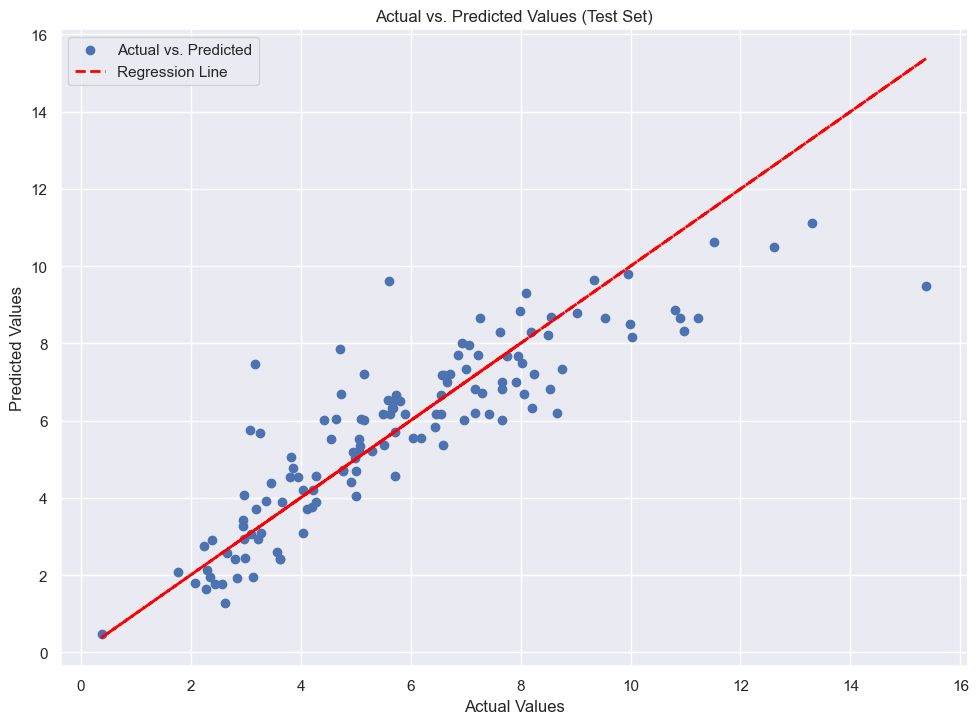

In [47]:
# Scatter plot for actual vs predicted values in the test set
plt.scatter(y_test, y_test_pred, label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Test Set)')

# Plot the regression line
plt.plot(y_test, y_test, color='red', linestyle='dashed', linewidth=2, label='Regression Line')

plt.legend()
plt.show()


In [48]:
# coefficient  & intercept
print(model.coef_) 
print(model.intercept_)

[ 0.16441295  0.32631283  0.35799367 -0.11252285]
-15.866847047739263


In [49]:
# To Predict:-
#predict the Lung Capacity of an individual's Age =6 ,Height = 56 ,Gender= female (0) and Smoking habits = 0(no):
newX1=np.array([6,56,0,0]).reshape(1,4)
predictedLungCap = model.predict(newX1)
print("Predicted Lung Capacity :",predictedLungCap)

Predicted Lung Capacity : [3.39314931]


#  With masking outliers

 The get_dummies() function is used to convert categorical variable into dummy/indicator variables. 
pandas has get_dummies(), which has a parameter drop_first you can set to True --- to drop the first dummy variable column for each


In [50]:
column_names_for_onehot_m = mask.columns[3:]
df_m= pd.get_dummies(mask, columns=column_names_for_onehot_m, drop_first=True)


In [51]:
#X should in 2D matrix and y be 1D

X_m=df_m.iloc[:,1:5].values
y_m=df_m.iloc[:,0].values

print(X_m.shape,y_m.shape)

(639, 4) (639,)


In [52]:
# seed value =random_state --- decide the accuracy 
X_train_m,X_test_m,y_train_m,y_test_m=train_test_split(X_m,y_m,test_size=0.2,random_state=0)

print(X_train_m.shape,X_test_m.shape,y_train_m.shape,y_test_m.shape)

(511, 4) (128, 4) (511,) (128,)


# Linear Regression with masking


# To check how good model is

#Model evaluation for training dataset and testing dataset

#We will evaluate our model using RMSE- (root mean squared error )and R2-score.



In [53]:
model_m=LinearRegression()
# training data to fit model
model_m.fit(X_train_m,y_train_m) # this model.fit figure out coeff and intercept

# model evaluation for training set

#predict the values on the X_training data for y_train_predict
y_train_pred_m = model_m.predict(X_train_m)
# RMSE on training dataset
rmse_train_m= (np.sqrt(mean_squared_error(y_train_m, y_train_pred_m)))
# R2 on training dataset
r2_train_m = r2_score(y_train_m, y_train_pred_m)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_train_m))
print('R2 score is {}'.format(r2_train_m))
print("\n")


# model evaluation for training set

#predict the values on the X_test data for y_test_pred
y_test_pred_m = model_m.predict(X_test_m)

# # root mean square error of the model- RMSE on testing dataset
rmse_test_m= (np.sqrt(mean_squared_error(y_test_m, y_test_pred_m)))


# r-squared score of the model - R2 on training dataset
r2_test_m = r2_score(y_test_m, y_test_pred_m)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test_m))
print('R2 score is {}'.format(r2_test_m))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 1.1749640615505346
R2 score is 0.7616520869154904


The model performance for testing set
--------------------------------------
RMSE is 1.1177924101105734
R2 score is 0.8071055231510541




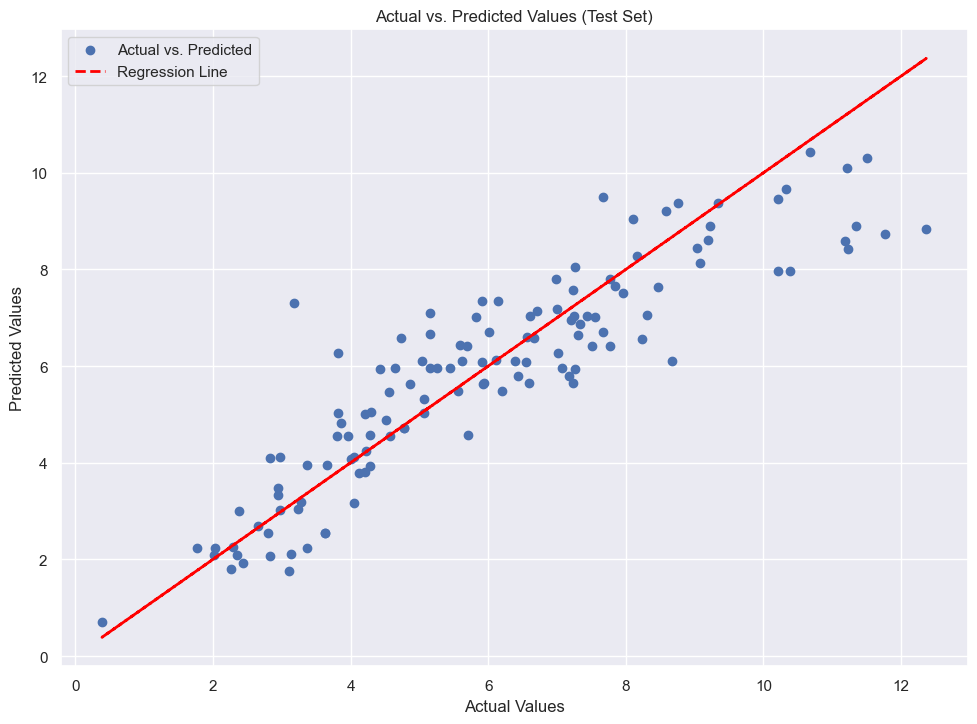

In [54]:
# Scatter plot for actual vs predicted values in the test set
plt.scatter(y_test_m, y_test_pred_m, label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Test Set)')

# Plot the regression line
plt.plot(y_test_m, y_test_m, color='red', linestyle='dashed', linewidth=2, label='Regression Line')

plt.legend()
plt.show()

In [55]:
# coefficient  & intercept
print(model_m.coef_) 
print(model_m.intercept_)

[ 0.15973055  0.30691941  0.32654516 -0.06666564]
-14.681789255103514


# As observed R2 score without outliers is more than with outliers

Now we have a regression object that are ready to predict Lung Capacity values 
based on a individual's Age,Height ,Gender and Smoking habits:

In [56]:
#predict the Lung Capacity of an individual's Age = 6,Height = 56 ,Gender= male (0) and Smoking habits = 0 (no):
newX=np.array([9,60,1,0]).reshape(1,4)
# matched shape of X
# apply same preprocessing while training the model

In [57]:
predictedLungCap = model_m.predict(newX)
print("Predicted Lung Capacity :",predictedLungCap)

Predicted Lung Capacity : [5.49749531]


In [58]:
#predict the Lung Capacity of an individual's Age = 8 ,Height = 60 ,Gender= male (1) and Smoking habits = 1 (yes):
newX1=np.array([8,58.5,0,0]).reshape(1,4)
predictedLungCap = model_m.predict(newX1)

In [59]:
print("Predicted Lung Capacity :",predictedLungCap)

Predicted Lung Capacity : [4.55084048]


In [60]:
# To validate co-eff:- 
4.36386003 + (0.16334546 * 1)+(0.30291861*2.5)

5.284502015